In [5]:
import pickle
svm_1 = pickle.load(open("supportVectorMachine_1.mod", 'rb'))
svm_2 = pickle.load(open("supportVectorMachine_2.mod", 'rb'))
ovr_1 =  pickle.load(open("oneVsRest_1.mod", 'rb'))
ovr_2 =  pickle.load(open("oneVsRest_2.mod", 'rb'))

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_pickle("../data_file_w_ts_kat_al.pkl")
target = pd.read_pickle("../target_file_w_ts_kat_al.pkl")
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(data[[225280]])
data[225280] = pd.DataFrame( min_max_scaler.transform(data[[225280]])   )



In [14]:
from sklearn.metrics import confusion_matrix

X_train_sv_1, X_test_sv_1, y_train_sv_1, y_test_sv_1 = train_test_split(data, target, test_size = 0.2, random_state = 42)
y_pred = svm_1.predict(X_test_sv_1)
cf_1 = confusion_matrix(y_test_sv_1,y_pred, labels=['aanwezig','buiten', 'niets'] )
print(cf)


[[147  10   3]
 [  1  74   0]
 [  0   0 293]]


In [15]:
X_train_sv_2, X_test_sv_2, y_train_sv_2, y_test_sv_2 = train_test_split(data, target, test_size = 0.2, random_state = 43)
y_pred = svm_2.predict(X_test_sv_2)
cf_2 = confusion_matrix(y_test_sv_2,y_pred, labels=['aanwezig','buiten', 'niets'] )
print(cf)

[[147  10   3]
 [  1  74   0]
 [  0   0 293]]


In [16]:
X_train_ovr_1, X_test_ovr_1, y_train_ovr_1, y_test_ovr_1 = train_test_split(data, target, test_size = 0.2, random_state = 42)
y_pred = ovr_1.predict(X_test_ovr_1)
cf_3 = confusion_matrix(y_test_ovr_1,y_pred, labels=['aanwezig','buiten', 'niets'] )
print(cf)

[[147  10   3]
 [  1  74   0]
 [  0   0 293]]


In [17]:
X_train_ovr_2, X_test_ovr_2, y_train_ovr_2, y_test_ovr_2 = train_test_split(data, target, test_size = 0.2, random_state = 43)
y_pred = ovr_2.predict(X_test_ovr_2)
cf_4 = confusion_matrix(y_test_ovr_2,y_pred, labels=['aanwezig','buiten', 'niets'] )
print(cf)

[[147  10   3]
 [  1  74   0]
 [  0   0 293]]


In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def heatmap(cf, name):
    ax = sns.heatmap(cf/np.sum(cf), annot=True, 
                fmt='.2%', cmap='Blues')

    ax.set_title(f'model {name} \n\n');
    ax.set_xlabel('\nPredicted label Category')
    ax.set_ylabel('Actual label Category ');

    ax.xaxis.set_ticklabels(['aanwezig','buiten', 'niets'])
    ax.yaxis.set_ticklabels(['aanwezig','buiten', 'niets'])

    plt.show()

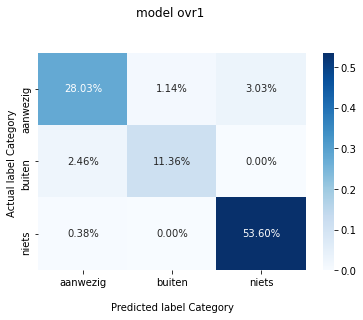

In [26]:
heatmap(cf_1, "ovr1")

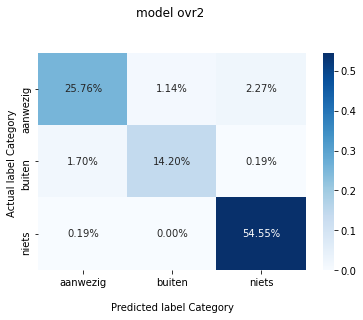

In [27]:
heatmap(cf_2, "ovr2")

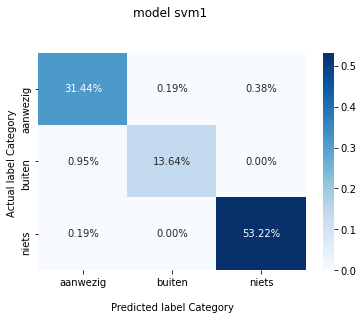

In [28]:
heatmap(cf_3, "svm1")

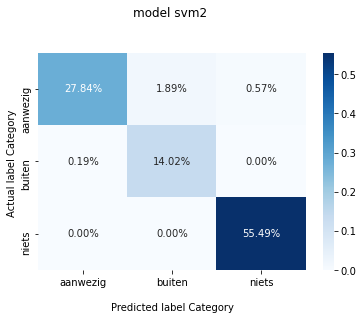

In [29]:
heatmap(cf_4, "svm2")